<a href="https://colab.research.google.com/github/donghyundavidchoi/Data_Analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EC%A0%9C/%ED%91%9C%EC%A4%80%ED%99%94_StandardScaler_npstd%EC%99%80pdstd%EC%9D%98%EC%B0%A8%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 그 중앙값을 구하시오.

In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-/view?usp=sharing
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 121kB/s]


In [2]:
!kaggle datasets download -d agileteam/bigdatacertificationkr

bigdatacertificationkr.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip /content/bigdatacertificationkr.zip

Archive:  /content/bigdatacertificationkr.zip
replace basic1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: basic1.csv              
  inflating: basic1_json.json        
  inflating: basic1_xml.xml          
  inflating: basic2.csv              
  inflating: basic3.csv              


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('/content/basic1.csv')

In [6]:
data

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


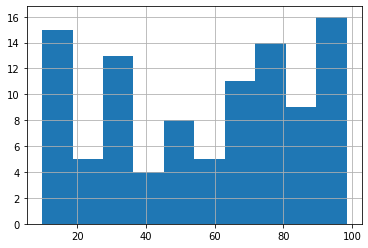

In [7]:
data['f5'].hist()

----------

# sklearn의 StandardScaler() 함수 선언

In [8]:
standardizer = StandardScaler()

-----------

# f5에 대해 표준화 진행

In [9]:
data2 = data
data2['f5'] = standardizer.fit_transform(data2[['f5']])

In [10]:
data2

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,1.220815
1,id02,9.0,서울,70.0,1,NaN,ENFJ,0.127343
2,id03,27.0,서울,61.0,1,NaN,ISTJ,-1.394535
3,id04,75.0,서울,NaN,2,NaN,INFP,-0.143667
4,id05,24.0,서울,85.0,2,NaN,ISFJ,-0.970085
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,-0.143667
96,id97,100.0,경기,NaN,0,NaN,INFP,0.393896
97,id98,39.0,경기,58.0,2,NaN,INFP,1.472730
98,id99,1.0,경기,47.0,0,NaN,ESFJ,1.435683


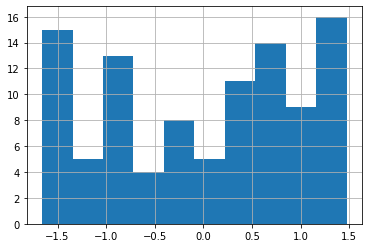

In [11]:
data2['f5'].hist()

f5의 데이터가 표준화되었음을 히스토그램으로 확인

----------

# 표준화된 f5 값의 중위값 출력

In [12]:
print(data2['f5'].median())

0.260619629559015


-------------

# sklearn 없이 직접 계산하여 표준화하기

In [13]:
data3 = data

In [14]:
data3['f5'] = ( data3['f5'] - data3['f5'].mean() ) / data3['f5'].std()


In [15]:
print(data3['f5'].median())

0.25931325727460064


**- 중요 -**   

**직접 계산한 결과가 sklearn의 StandradScaler를 썼을 때와 다르다.   
sklearn은 numpy의 std를 사용하는데 이는 모표준편차(ddof=0)를 default로 한다.   
반면 pandas의 std는 표본표준편차(ddof=1)를 default로 한다.   
따라서 분석하려는 데이터가 모집단인지 표본인지에 유심히 살펴보고 모표준편차를 사용할지 표본표준편차를 사용할지 결정하여 신중히 메소드를 사용해야한다.**

In [16]:
data4 = data

In [17]:
data4['f5'] = ( data4['f5'] - data4['f5'].mean() ) / data4['f5'].std(ddof=0)

In [18]:
print(data4['f5'].median())

0.26061962955901463


pandas의 std를 ddof=0으로 설정하여 모표준편차로 바꾸자 StandardScaler를 사용한 결과와 값이 같아진 것을 확인할 수 있다.